# Reading and Plotting Geospace Data
## Tutorial Notebook for DLA/REU Fall 2017

## Geospace Coordinate Systems
----------
The locations of objects (spacecraft) or regions (ionospheric regions) in geospace are often described in one of two coordinates systems: geographic, or geomagnetic. Both coordinate systems are spherical with one distance (e.g. $r$) and two angles (e.g. $\theta$, $\phi$) as the coordinates.


## Geographic Coordinates
----------
Geographic Coordinates used in geospace research are very similar to the the familiar latitude and longitude that specify locations on a map. In fact, they are identical.

### Common Variants
* latitude, longitude, altitude (distance from earth's **surface**)
* latitude, longitude, radius (distance from earth's **center**, i.e. altitude + 6371.2 km)
* latitude, solar local time, altitude

### Solar Local Time
Solar local time is a expression of the azimuthal angle (i.e. the longitude) with a different zero (zero at the exact other side of the earth from where the sun is, i.e. where the local time is midnight). It is expressed in units of hours, instead of radians or degrees. To calculate you must use an algorithm that can tell you the subsolar latitude and longitude for a given time and day of year.
    
    Don't panic. You won't need to calculate any solar local time right now. This is just explained to help make sense of magnetic local time in the next section!

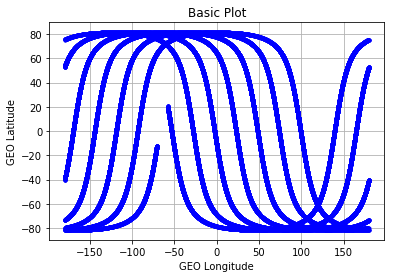

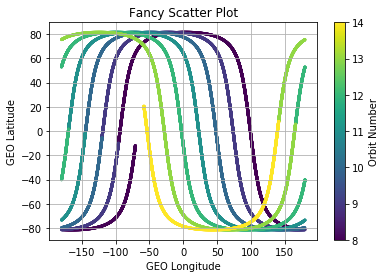

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#------------------------------------------------------
# Here we will load the positions of a satellite, 
# and look at it's track in geographic coordinates
#------------------------------------------------------
data = np.genfromtxt('dmsp_f15_locs.csv',delimiter=',')
orbitnum = data[:,0]
secofday = data[:,1]
hourofday = secofday/3600.
glat = data[:,2]
glon = data[:,3]

#Create a basic plot of longitude vs. latitude
f0 = plt.figure()
ax0 = f0.add_subplot(111)
ax0.plot(glon,glat,'b.')
ax0.set_xlabel('GEO Longitude')
ax0.set_ylabel('GEO Latitude')
ax0.grid(True)
ax0.set_title('Basic Plot')

#Create a fancier plot of longitude vs latitude
#with the color bar set to the orbit number
f = plt.figure()
ax = f.add_subplot(111)
mappable = ax.scatter(glon,glat,4,orbitnum)
ax.set_xlabel('GEO Longitude')
ax.set_ylabel('GEO Latitude')
ax.grid(True)
ax.set_title('Fancy Scatter Plot')
plt.colorbar(mappable,label='Orbit Number')
plt.show()



## Geomagnetic Coordinates
------------
Geomagnetic coordiantes are often used to describe phenomena that organize with respect to the earth's magnetic field, instead of it's surface. Since the electrons which create the aurora must follow the earth's magnetic field lines, the aurora is one such phenomenon.

### Common Variants
* magnetic latitude, magnetic longitude, altitude
* **magnetic latitude, magnetic local time, altitude (MOST COMMON)** 

### What the heck is a magnetic latitude?
Has anyone every told you that a compass needle doesn't point *exactly* towards north? That's true, because the geomagnetic north pole is about 11 degrees offset from the geographic north pole  (i.e. the point intersected by the earth's axis of rotation). So
* $90^{o}$ *geographic* latitude is the north pole 
* $90^{o}$ *geomagnetic* latitude is the magnetic north pole.

### Magnetic Local Time
Magnetic local time is similar to solar local time, except that instead of calculating the *geographic* latitude and longitude where the sun is at exactly noon, you calculate the *geomagnetic* latitude and longitude. Then you subtract the subsolar magnetic longitude from the magnetic longitude of the point you want to describe, convert from degrees to hours, and then subtract 12 hours. 

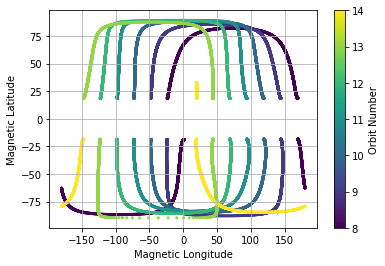

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#------------------------------------
# Now we'll load the same data 
# and look at the track
# in geomagnetic coordinates
#------------------------------------
data = np.genfromtxt('dmsp_f15_locs.csv',delimiter=',')
orbitnum = data[:,0]
secofday = data[:,1]
mlat = data[:,4]
mlon = data[:,5]

#Create a plot of longitude vs latitude
f = plt.figure()
ax = f.add_subplot(111)
mappable = ax.scatter(mlon,mlat,4,orbitnum)
ax.set_xlabel('Magnetic Longitude')
ax.set_ylabel('Magnetic Latitude')
ax.grid(True)
plt.colorbar(mappable,label='Orbit Number')
plt.show()


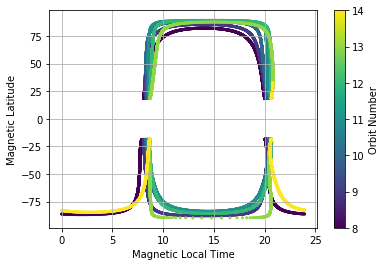

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------
#Now let's see the same thing in magnetic local time
#---------------------------------------------------

data = np.genfromtxt('dmsp_f15_locs.csv',delimiter=',')
orbitnum = data[:,0]
secofday = data[:,1]
mlat = data[:,4]
mlt = data[:,6]

#Create a plot of longitude vs latitude
#with the orbit index as the color
f = plt.figure()
ax = f.add_subplot(111)
mappable = ax.scatter(mlt,mlat,4,orbitnum)
ax.set_xlabel('Magnetic Local Time')
ax.set_ylabel('Magnetic Latitude')
ax.grid(True)
plt.colorbar(mappable,label='Orbit Number')
plt.show()


## "Dial" Plots

A dial plot is one of many names for a polar plot that is literally polar, i.e. it represents looking down on one of the poles of the earth. The center of the plot is the pole, the radial coordinate is latitude, and the azimuthal coordinate is local time. Typically, toward the sun (12:00 local time) is at the top, but it can also be on the left side.

A dial plot is specific to either the northern or southern hemisphere, depending on which pole forms it's center. It gives no information about altitude.

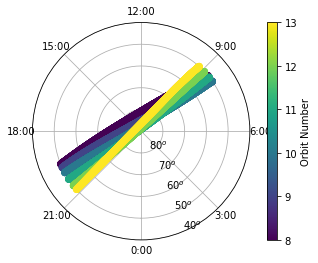

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------
#Now let's see the same data as a dial plot
#---------------------------------------------------

#Make a helper function
def latlt2polar(lat,lt,hemisphere):
    """
    Converts an array of latitude and lt points to polar for a top-down dialplot (latitude in degrees, LT in hours)
    i.e. makes latitude the radial quantity and MLT the azimuthal 

    get the radial displacement (referenced to down from northern pole if we want to do a top down on the north, 
    or up from south pole if visa-versa)
    """
    from numpy import pi
    if hemisphere=='N':
        r = 90.-lat
    elif hemisphere=='S':
        r = 90.-(-1*lat)
    else:
        raise ValueError('%s is not a valid hemisphere, N or S, please!' % (hemisphere))
    #convert lt to theta (azimuthal angle) in radians
    theta = lt/24. * 2*pi

    #the pi/2 rotates the coordinate system from
    #theta=0 at negative y-axis (local time) to
    #theta=0 at positive x axis (traditional polar coordinates)
    return r,theta

data = np.genfromtxt('dmsp_f15_locs.csv',delimiter=',')
orbitnum = data[:,0]
mlat = data[:,4]
mlt = data[:,6]

#Let's look at Northern hemisphere polar region only
N = mlat > 50.

#Now we can turn latitude and local time into the 
#typical 'top-down' (looking down on the North or South pole)
#polar coordinates
rN,thetaN = latlt2polar(mlat[N],mlt[N],'N')
orbitnumN = orbitnum[N]

#Now we can finally try to plot and see what we get
f = plt.figure()
ax = f.add_subplot(111,projection='polar')

dot_size = 40
mappable = ax.scatter(thetaN,rN,dot_size,orbitnumN,zorder=10)
plt.colorbar(mappable,ax=ax,label='Orbit Number')

#Rotate the plot so that noon is at the top and midnight
#is at the bottom, and fix the labels so radial direction
#is latitude and azimuthal direction is local time in hours
ax.set_theta_zero_location('S')
theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
ax.set_thetagrids(theta_label_values,labels=theta_labels)

r_label_values = 90.-np.array([80.,70.,60.,50.,40.])
r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
ax.set_rgrids(r_label_values,labels=r_labels)

plt.show()

## What does any of this have to do with the aurora?

The spacecraft that we are looking at here has an instrument which can observe the electrons coming from the magnetosphere, which cause the aurora. Using an automatic algorithm which examines the instrument's data to find when the flux of electrons gets strong enough to be the auroral region, our group has identified when the spacecraft is in the aurora.

Let's look at the results of applying that algorithm to this data.

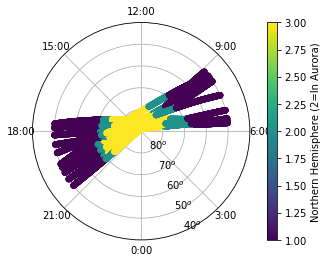

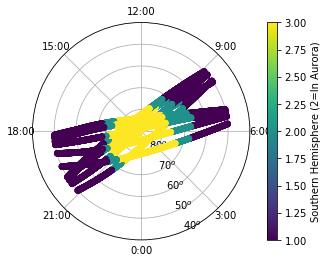

In [8]:
#-----------------------------------------------------
#For a better view of the aurora, we can add an
#additional spacecraft (which has the same instrument)
#and we can also look at the southern hemisphere
#-----------------------------------------------------

fN = plt.figure()
axN = fN.add_subplot(111,projection='polar')
fS = plt.figure()
axS = fS.add_subplot(111,projection='polar')

for fn in ['dmsp_f15_locs.csv','dmsp_f13_locs.csv']:
    data = np.genfromtxt(fn,delimiter=',')
    mlat = data[:,4]
    mlt = data[:,6]
    auroralregion = data[:,7]
    
    #Sometimes the algorithm is not able to find
    #the aurora (or the spacecraft doesn't cross it)
    #In this case the auroral region code is 0
    #This line makes those orbits not plot
    auroralregion[auroralregion<1]=np.nan

    N = mlat > 50.
    S = mlat < -50.

    #Now we can turn latitude and local time into the 
    #typical 'top-down' (looking down on the North or South pole)
    #polar coordinates
    rN,thetaN = latlt2polar(mlat[N],mlt[N],'N')
    rS,thetaS = latlt2polar(mlat[S],mlt[S],'S')

    dot_size = 30

    #Plot the Northern Hemisphere
    #----------------------------

    mappableN = axN.scatter(thetaN,rN,dot_size,auroralregion[N],zorder=10)
    mappableS = axS.scatter(thetaS,rS,dot_size,auroralregion[S],zorder=10)

plt.colorbar(mappableN,ax=axN,label='Northern Hemisphere (2=In Aurora)')
plt.colorbar(mappableS,ax=axS,label='Southern Hemisphere (2=In Aurora)')

#Change the polar plot to a dial plot
for ax in [axN,axS]:
    #Rotate the plot so that noon is at the top and midnight
    #is at the bottom, and fix the labels so radial direction
    #is latitude and azimuthal direction is local time in hours
    ax.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.,40.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax.set_rgrids(r_label_values,labels=r_labels)

plt.show()

## Exercise: Load DMSP Auroral Boundary Data and Plot It

Above, we are looking at point-by-point satellite data, which is a pretty inconvenient way to store the information about where the aurora is, if that's all you are interested in.

We've made auroral boundaries files which contain only the start and end positions of each crossing of the aurora the spacecraft makes as magnetic latitude and magnetic local time (**same sort of format as auroral models!**)

Load this data (dmsp-f15_ssj_precipitating-electrons-ions_20060603_v1.1.3_boundaries.csv) and plot it's auroral crossings:

1. On a regular magnetic latitude, magnetic local time plot 
2. On a dial plot

        Hint: Open the file in notepad or wordpad to see what each column in the data is

In [20]:
data = np.genfromtxt('dmsp-f15_ssj_precipitating-electrons-ions_20060603_v1.1.3_boundaries.csv',delimiter=',')
data = data[1:,:]